# <center>Markov processes and Applications</center>
# <center>NUMERICAL PROJECT</center>
<center>Victor DUC</center>
<center>April 6, 2023</center>

---

## Table of contents

[<font size="4"><strong>1 &thinsp; Process from Exercise 4 (PC Jump Intro)</strong></font>](#chapter1) <br> 
&emsp; [<strong>1.1 Theoretical objective</strong>](#section_1_1) <br>
&emsp;&emsp; [1.1.1 Theoretical result 1](#section_1_1_1) <br>
&emsp;&emsp; [1.1.2 Theoretical result 2](#section_1_1_2) <br>
&emsp; [<strong>1.2 Numerical objective</strong>](#section_1_2) <br>
&emsp;&emsp; [1.2.1 Simulation of the process](#section_1_2_1) <br>
&emsp;&emsp; [1.2.2 Validity of the theoretical result](#section_1_2_2) <br>
&emsp;&emsp;&emsp; [1.1.2.1 Validity of the theoretical result 1](#section_1_2_2_1) <br>
&emsp;&emsp;&emsp; [1.1.2.2 Validity of the theoretical result 2](#section_1_2_2_2) <br>

---

I chose a jumping process appearing in the exercise sheets but theoretical results not demonstrated in class.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# 1    Process from Exercise 4 <a class="anchor" id="chapter1"></a>

## 1.1 Theoretical objective <a class="anchor" id="section_1_1"></a>

Let $E:=\{1,2,3\}$ and ${(X_t)}_{t\in\mathbb{R}_+}$ a Markov jump process taking values in $E$ with jump times ${(T_n)}_{n\in\mathbb{N}}$ (satisfying $T_0=0$) and infinitesimal generator 
\begin{equation*} Q:=\begin{pmatrix}- 1 & 0 & 1 \\ 0 & -1 & 1 \\ 0 & 0 & 0\end{pmatrix} \end{equation*}

The jump intensity function is
$$\begin{array}[t]{@{}lrcl}
\lambda :& E & \longrightarrow & \mathbb{R}_+ \\
& x & \longmapsto & -Q_{x,x}=\mathbf{1}_{\{1,2\}}(x)=\mathbf{1}_{x\neq 3}=\begin{cases} 1 & \text{ if } x\in \{1,2\} \\ 0 & \text{ if } x=3\end{cases} \end{array}$$

As $E$ is finite, ${(X_t)}_{t\in\mathbb{R}_+}$ is non explosive. The state $3$ is the unique absorbing state

$$\forall x\in E \quad Q_{x,x}=0 \iff \lambda(x)=0 \iff x=3$$

The process ${(X_t)}_{t\in\mathbb{R}_+}$ is not irreducible (starting from state $3$ the process never leaves state $3$). The embedded chain verifies  

\begin{equation}
\forall n\in\mathbb{N},\ \forall (x,y)\in E^2\quad \lambda(x)=0 \implies \mathbb{P}(X_{T_{n+1}}=y\,|\,X_{T_n}=x) = \delta_{xy}=\mathbf{1}_{x=y} \tag{1}
\end{equation}
and 
\begin{equation}
\forall n\in\mathbb{N},\ \forall (x,y)\in E^2\quad \lambda(x)\neq 0 \implies \mathbb{P}(X_{T_{n+1}}=y\,|\,X_{T_n}=x)= \begin{cases} \frac{Q_{x,y}}{\lambda(x)} & \text{ if } x\neq y \\ 0 & \text{ if } x=y\end{cases} \tag{2}
\end{equation}
<!-- We will use **(1)** and **(2)** in the code. -->

### 1.1.1 Theoretical result 1 <a class="anchor" id="section_1_1_1"></a>


<div class="alert alert-block alert-warning">
<b>Theoretical result 1.</b> <br> 
    $$\forall t\in\mathbb{R}_+,\ \forall (x,y)\in E^2\quad P_t(x,y)=\mathbb{P}(X_t=y\,|\,X_0=x)=\begin{pmatrix}
   \mathrm{e}^{-t} & 0 & 1-\mathrm{e}^{-t}\\
        0 & \mathrm{e}^{-t} & 1-\mathrm{e}^{-t}\\
        0 & 0 & 1
    \end{pmatrix}_{x,y}$$
</div>

<blockquote> <strong>Proof.</strong>

Let $t\in\mathbb{R}_+$\,. Let $x,y\in E$. One has
    $$\mathbb{P}(X_t=y\,|\,X_0=x)=P_{xy}(t)=(\mathrm{e}^{tQ})_{xy}=\left(\sum_{k=0}^{+\infty}\frac{Q^kt^k}{k!}\right)_{xy}$$
    Since
    $$Q^2=\begin{pmatrix}1 & 0 & -1 \\ 0 & 1 & -1 \\ 0 & 0 & 0\end{pmatrix}\qquad \text{and}\qquad Q^3=Q$$
    one has
    $$\forall k\in\mathbb{N}\quad Q^k=\begin{cases} Q^2 & \text{ if } k \in 2\mathbb{N}^*\\ Q & \text{ if } k \in 2\mathbb{N}+1\\
     \mathrm{I}_3 & \text{ if } k=0\end{cases}$$
    One can deduce that
    \begin{align*} \sum_{k=0}^{+\infty}\frac{Q^kt^k}{k!}&= \mathrm{I}_3 + \sum_{k\in 2\mathbb{N}^*} \frac{Q^kt^k}{k!} + \sum_{k\in 2\mathbb{N}+1} \frac{Q^kt^k}{k!}\\
    &= \mathrm{I}_3 + \sum_{n=1}^{+\infty} \frac{Q^{2n}t^{2n}}{(2n)!} + \sum_{n=0}^{+\infty} \frac{Q^{2n+1}t^{2n+1}}{(2n+1)!}\\
    &= \mathrm{I}_3 + Q^2\sum_{n=1}^{+\infty} \frac{t^{2n}}{(2n)!} + Q\sum_{n=0}^{+\infty} \frac{t^{2n+1}}{(2n+1)!}\\
    &= \mathrm{I}_3 + Q^2\left(\sum_{n=0}^{+\infty} \frac{t^{2n}}{(2n)!}-1\right) + Q\sum_{n=0}^{+\infty} \frac{t^{2n+1}}{(2n+1)!}\\
    &= \mathrm{I}_3 + Q^2 \big(\mathrm{cosh}(t)-1\big)+ Q \mathrm{sinh}(t)\\
    &= \begin{pmatrix}
        1 + \big(\mathrm{cosh}(t)-1\big) -\mathrm{sinh}(t) & 0 & -\big(\mathrm{cosh}(t)-1)+\mathrm{sinh}(t)\\
        0 & 1+ \big(\mathrm{cosh}(t)-1\big)-\mathrm{sinh}(t) & -\big(\mathrm{cosh}(t)-1\big)+\mathrm{sinh}(t)\\
        0 & 0 & 1
    \end{pmatrix}\\
    &= \begin{pmatrix}
    \mathrm{cosh}(t)-\mathrm{sinh}(t) & 0 & 1-\mathrm{cosh}(t)+\mathrm{sinh}(t)\\
        0 & \mathrm{cosh}(t)-\mathrm{sinh}(t) & 1-\mathrm{cosh}(t)+\mathrm{sinh}(t)\\
        0 & 0 & 1
    \end{pmatrix}\\
    &= \begin{pmatrix}
   \mathrm{e}^{-t} & 0 & 1-\mathrm{e}^{-t}\\
        0 & \mathrm{e}^{-t} & 1-\mathrm{e}^{-t}\\
        0 & 0 & 1
    \end{pmatrix}
    \end{align*} 
    
</blockquote>

### 1.1.2 Theoretical result 2 <a class="anchor" id="section_1_1_2"></a>

<div class="alert alert-block alert-warning">
<b>Theoretical result 2.</b> <br> 
    The distribution $\pi:=\begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}$ on $E$ is a stationary distribution for ${(X_t)}_{t\in\mathbb{R}_+}$.
</div>

<blockquote> <strong>Proof 1.</strong> 

Let $\pi:=\begin{pmatrix} \pi(\{1\}) \\ \pi(\{2\}) \\ \pi(\{3\}) \end{pmatrix}$ be a probability on $E$. One has

\begin{eqnarray*}
\pi \text{ is a stationnary distribution for } {(X_t)}_{t\in\mathbb{R}_+} &\iff & 
\pi^\top Q= 0_3 \\
&\iff & \begin{pmatrix} \pi(\{1\}) & \pi(\{2\}) & \pi(\{3\}) \end{pmatrix}\begin{pmatrix}- 1 & 0 & 1 \\ 0 & -1 & 1 \\ 0 & 0 & 0\end{pmatrix} = 0_3 \\
&\iff & \begin{pmatrix} -\pi(\{1\}) & -\pi(\{2\}) & \pi(\{1\})+\pi(\{2\}) \end{pmatrix} = 0_3 \\
&\iff & \begin{cases} -\pi(\{1\})=0 \\ 
    -\pi(\{2\})=0\\
    \pi(\{1\})+\pi(\{2\})=0\end{cases}\\
&\iff & \begin{cases}\pi(\{1\})=0 \\ \pi(\{2\})=0 \end{cases}
\end{eqnarray*}

As $\pi$ is a probability on $E$, $\pi(\{1\})+\pi(\{2\})+\pi(\{3\})=1$ so $\pi(\{3\})=1$. Eventually $\pi:=\begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}$ is a stationnary distribution for ${(X_t)}_{t\in\mathbb{R}_+}$.

<div class="alert alert-block alert-info">
    <b>Reference. </b> Nicolas Privault, <em>Understanding Markov Chains</em>, 2018, page 240. <a href="http://www.math.uni.wroc.pl/~szekli/documents/m-CHAINS-21/nicolas18.pdf">(see here)</a>
</div>
<img src="Capture2.PNG" alt="Drawing" style="width: 600px;"/>

</blockquote>


<blockquote> <strong>Proof 2.</strong>

Let $(x,y)\in E^2$. Using the [<code style="background:rgb(252, 243, 207);color:rgb(154, 125, 10)"><strong>Theoretical Result 1</strong></code>](#section_1_1_1)
$$\forall t\in\mathbb{R}_+ \quad P_t(x,y)=\mathbb{P}(X_t=y\,|\,X_0=x)=\begin{pmatrix}
   \mathrm{e}^{-t} & 0 & 1-\mathrm{e}^{-t}\\
        0 & \mathrm{e}^{-t} & 1-\mathrm{e}^{-t}\\
        0 & 0 & 1
    \end{pmatrix}_{x,y}$$
so $\pi$ is the asymptotic distribution of ${(X_t)}_{t\in\mathbb{R}_+}$ :
    
$$\lim\limits_{t\rightarrow +\infty} P_t(x,y)=\lim\limits_{t\rightarrow +\infty} \mathbb{P}(X_t=y\,|\,X_0=x)=\begin{pmatrix} 0 & 0 & 1 \end{pmatrix}_y=\pi(\{y\})$$
    
As $E$ is finite and the limiting distribution $\pi$ of ${(X_t)}_{t\in\mathbb{R}_+}$ is independant of the initial state $x$, $\pi$ is a stationary distribution for ${(X_t)}_{t\in\mathbb{R}_+}$.

<div class="alert alert-block alert-info">
    <b>Reference. </b> Nicolas Privault, <em>Understanding Markov Chains</em>, 2018, page 241. <a href="http://www.math.uni.wroc.pl/~szekli/documents/m-CHAINS-21/nicolas18.pdf">(see here)</a>
</div>
    
<img src="Capture.PNG" alt="Drawing" style="width: 500px;"/>

</blockquote>

## 1.2 Numerical objective <a class="anchor" id="section_1_2"></a>

In [2]:
# Define the state space, infinitesimal generator and jump intensity function
E = [1, 2, 3]
Q = np.array([[-1, 0, 1], [0, -1, 1], [0, 0, 0]])
lam = -1*np.diag(Q)
lam

array([1, 1, 0])

### 1.2.1 Simulation of the process <a class="anchor" id="section_1_2_1"></a>

In [3]:
def simulate_markov_jump_process(T, Q, lam, X_0):
    """
    Simulate a Markov Jump Process.

    Parameters:
    T (float): time horizon
    Q (ndarray): infinitesimal generator
    lam (function): jump intensity function
    X_0 (int): initial state

    Returns:
    times (ndarray): jump times (T_n)_n
    states (ndarray): state at each jump time (Z_n)_n
    """
    # Initialize variables
    t = 0
    X = X_0
    
    # Initialize lists to store the state and time
    times = [t]
    states = [X]
    
    # Simulation loop
    while t < T:
        
        next_states = [i for i in range(len(Q[X-1,:]))] # next_states = [0, 1, 2]
        
        if lam[X-1] == 0: # Absorbing state
            next_probs = [1 if i==X-1 else 0 for i in next_states] # next_probs[i] = P(X_t=i+1 | X_0=X) Equation (1)
            while t < T:
                states.append(X) # (X_t)_t remains in state X
                t += 0.01 # Increment the time by a small value
                times.append(t)
            break  
        else: # Not absorbing state
            next_probs = [Q[X-1,i]/lam[X-1] if i !=X-1 else 0 for i in next_states] # next_probs[i] = P(X_t=i+1 | X_0=X) Equation (2)
            next_probs = [p/sum(next_probs) for p in next_probs] # Normalize the transition probabilities
            U = np.random.exponential(1/lam[X-1]) # Generate an exponential random variable with parameter lambda(X)
            t += U
            if t < T:
                Y = np.random.choice(next_states, p=next_probs) # Choose the next state according to the transition probabilities
                X = Y+1 
                states.append(X) # (X_t)_t moves to state Y+1
                times.append(t)

    return times, states

To obtain a graphical representation let's simulate
- 4 trajectories starting from $X_0=1$
- 4 trajectories starting from $X_0=2$

**Remark.** As 3 is an absorbing state, starting from $X_0=3$ leads to a constant process.

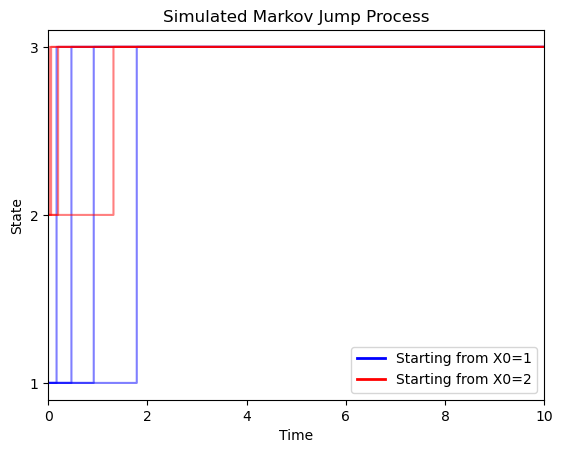

In [4]:
from matplotlib.lines import Line2D

# Set the simulation end time
T = 10

# Simulate multiple trajectories
num_trajectories = 4
results_X0_1 = []
results_X0_2 = []

for i in range(num_trajectories):
    
    # Simulate a trajectory starting from X_0=1 and store the results
    times, states = simulate_markov_jump_process(T, Q, lam, X_0=1)
    results_X0_1.append((times, states))
    
    # Simulate a trajectory starting from X_0=2 and store the results
    times, states = simulate_markov_jump_process(T, Q, lam, X_0=2)
    results_X0_2.append((times, states))

# Plot the simulated trajectories starting from X_0=1
for times, states in results_X0_1:
    plt.step(times, states, where='post', color='blue', alpha=0.5)

# Plot the simulated trajectories starting from X_0=2
for times, states in results_X0_2:
    plt.step(times, states, where='post', color='red', alpha=0.5)

# Define custom legend
custom_legend = [    Line2D([0], [0], color='blue', linewidth=2),
    Line2D([0], [0], color='red', linewidth=2)
]

axes = plt.gca()
axes.set_xlim(0, 10)
plt.xlabel('Time')
plt.ylabel('State')
axes.set_yticks([1, 2, 3])  # Set the y-axis ticks to only show y=1,2,3
plt.title('Simulated Markov Jump Process')
plt.legend(custom_legend, ['Starting from X0=1','Starting from X0=2'])
plt.show()

As expected, starting from $x=1$ or $x=2$, ${(X_t)}_{t\in\mathbb{R}_+}$ can only jump to the absorbing state $3$.

### 1.2.2  Validity of the theoretical result <a class="anchor" id="section_1_2_2"></a>

#### 1.2.2.1  Validity of the theoretical result 1 <a class="anchor" id="section_1_2_2_1"></a>

To validate the [<code style="background:rgb(252, 243, 207);color:rgb(154, 125, 10)"><strong>Theoretical Result 1</strong></code>](#section_1_1_1)
 let's choose $t\in \{0.25, 0.5, 0.75, 1.0, 1.25\}$ and $x=1$ so we are only looking to the first line 
 
 $$\begin{pmatrix} \mathrm{e}^{-t} & 0 & 1-\mathrm{e}^{-t} \end{pmatrix} \qquad \text{of}\qquad P_t=\begin{pmatrix}
   \mathrm{e}^{-t} & 0 & 1-\mathrm{e}^{-t}\\
        0 & \mathrm{e}^{-t} & 1-\mathrm{e}^{-t}\\
        0 & 0 & 1
    \end{pmatrix}$$
We want to show that 
 
 $$\forall y\in E\quad \mathbb{P}(X_t=y\,|\,X_0=1)=\begin{pmatrix} \mathrm{e}^{-t} & 0 & 1-\mathrm{e}^{-t} \end{pmatrix}_y$$
 
 - **Numerical**.  For $y\in E$. Do 1000 simulations. Compute the frequency of occurrence of state $y$ at time $t$ which has to be approximately $\mathbb{P}(X_t=y\,|\,X_0=1)$.
 - **Theoretical**. Compute $\begin{pmatrix} \mathrm{e}^{-t} & 0 & 1-\mathrm{e}^{-t} \end{pmatrix}$.

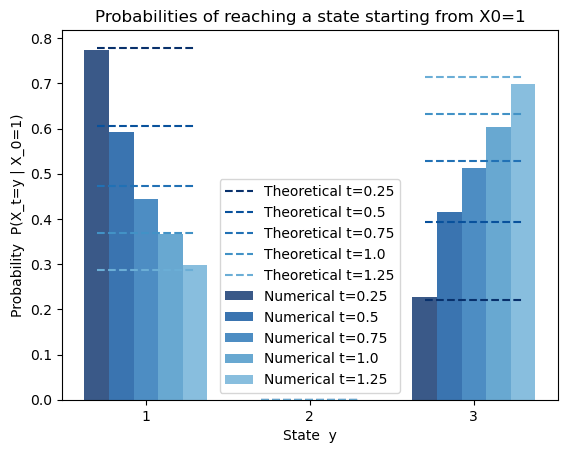

In [5]:
# Define the time steps for the simulation
ts = [0.25, 0.5, 0.75, 1.0, 1.25]

# Define the starting state
X_0 = 1

# Define the number of simulations
n_simulations = 1000

# Initialize the array to store the numerical probabilities
numerical_probs = np.zeros((len(E), len(ts)))

# Simulate the process and compute the numerical probabilities for each state and time
for j, t in enumerate(ts):
    for i, state in enumerate(E):
        n_occurrences = 0
        for k in range(n_simulations):
            times, states = simulate_markov_jump_process(t, Q, lam, X_0)
            if states[-1] == state: 
                n_occurrences += 1
        numerical_probs[i, j] = n_occurrences / n_simulations

# Compute the theoretical probabilities for each state and time
theoretical_probs = np.array([[np.exp(-t), 0, 1-np.exp(-t)] for t in ts])



# Define the shades of blue
blues = ['#08306b', '#08519c', '#2171b5', '#4292c6', '#6baed6']

# Plot the numerical and theoretical probabilities
width = 0.15
offsets = [-2*width, -width, 0, width, 2*width]
for j, t in enumerate(ts):
    for i, state in enumerate(E):
        x = state
        if i == len(E)-1:
            plt.bar(x+offsets[j], numerical_probs[i, j], label=f'Numerical t={t}', width=width, alpha=0.8, color=blues[j])
            plt.hlines(theoretical_probs[j, i], x-offsets[-1], x+offsets[-1], label=f'Theoretical t={t}', colors=blues[j], linestyles='dashed', linewidths=1.5)
        else:
            plt.bar(x+offsets[j], numerical_probs[i, j], width=width, alpha=0.8, color=blues[j])
            plt.hlines(theoretical_probs[j, i], x-offsets[-1], x+offsets[-1], colors=blues[j], linestyles='dashed', linewidths=1.5)
            
plt.xticks(E, E)
plt.xlabel('State  y')
plt.ylabel('Probability  P(X_t=y | X_0=1)')
plt.title(f'Probabilities of reaching a state starting from X0={X_0}')
plt.legend()
plt.show()

One can see that for all $t\in \{0.25, 0.5, 0.75, 1.0, 1.25\}$ and $y\in E$, the numerical frequency bar result is close to the dashed line of the matrix theoretical result. The <code style="background:rgb(252, 243, 207);color:rgb(154, 125, 10)"><strong>Theoretical Result 1</strong></code> is validated.

#### 1.2.2.2  Validity of the theoretical result 2 <a class="anchor" id="section_1_2_2_2"></a>

To validate the <code style="background:rgb(252, 243, 207);color:rgb(154, 125, 10)"><strong>Theoretical Result 2</strong></code>
 we will use the **Proof 2**. Let's choose $t\in [0,8]$ and $x=1$. We want to show that 
 
 $$\forall y\in E \quad \lim\limits_{t\rightarrow +\infty} \mathbb{P}(X_t=y\,|\,X_0=1)=\begin{pmatrix} 0 & 0 & 1 \end{pmatrix}_y=\pi(\{y\})$$
 
 - **Numerical**. For $y\in E$. Do 200 simulations. Compute the frequency of occurrence of state $y$ at time $t$ which has to be approximately $\mathbb{P}(X_t=y\,|\,X_0=1)$.
 - **Theoretical**. Use $\pi=\begin{pmatrix}0 \\ 0 \\ 1\end{pmatrix}$.

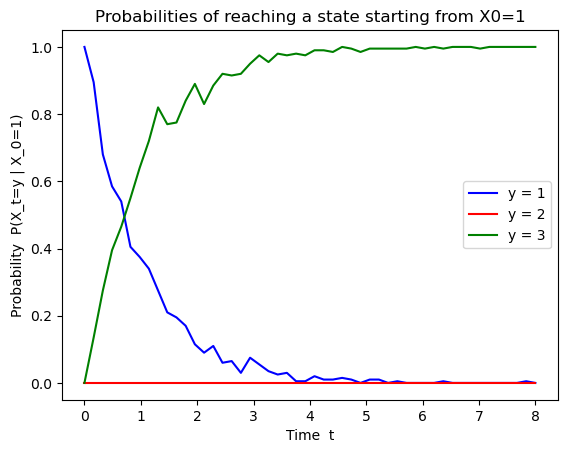

In [6]:
# Define the time steps for the simulation
ts = np.linspace(0, 8, num=50)

# Define the starting state
X_0 = 1

# Define the number of simulations
n_simulations = 200

# Initialize the array to store the numerical probabilities
numerical_probs = np.zeros((len(E), len(ts)))

# Simulate the process and compute the numerical probabilities for each state and time
for j, t in enumerate(ts):
    for i, state in enumerate(E):
        n_occurrences = 0
        for k in range(n_simulations):
            times, states = simulate_markov_jump_process(t, Q, lam, X_0)
            if states[-1] == state:
                n_occurrences += 1
        numerical_probs[i, j] = n_occurrences / n_simulations

        
# Define the shades of blue
blues = ['blue', 'red', 'green']

# Plot the numerical probabilities for each state and time
for i, state in enumerate(E):
    plt.plot(ts, numerical_probs[i, :], label=f'y = {state}', color=blues[i])
            
plt.xlabel('Time  t')
plt.ylabel('Probability  P(X_t=y | X_0=1)')
plt.title(f'Probabilities of reaching a state starting from X0={X_0}')
plt.legend()
plt.show()

One can see that 
$$\forall y\in E\quad \lim\limits_{t\rightarrow +\infty} \mathbb{P}(X_t=y\,|\,X_0=1)=\begin{pmatrix} 0 & 0 & 1 \end{pmatrix}_y=\pi(\{y\})$$
The <code style="background:rgb(252, 243, 207);color:rgb(154, 125, 10)"><strong>Theoretical Result 2</strong></code> is validated.